<a href="https://colab.research.google.com/github/boyoung21/ESAA/blob/main/0407_%EC%95%99%EC%83%81%EB%B8%94%ED%95%99%EC%8A%B5_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 앙상블 학습 개요

여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법 > 단일 분류기보다 신뢰성이 높은 예측값을 얻고자 함

- 정형 데이터 분류 시 뛰어난 성능 나타냄

# 앙상블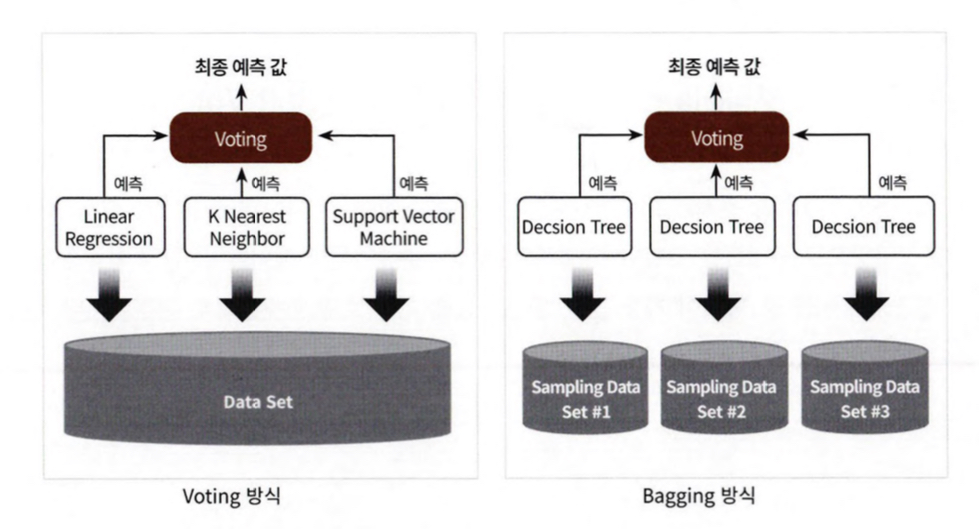

보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식

- 보팅(voting): 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것
> 다른 알고리즘이 같은 데이터 세트에 대해서 학습하고 예측한 결과를 결합하여 최종 예측 결과를 도출하는 방식

- 배깅(bagging): 각각의 분류기가 모두 같은 유형의 알고리즘 기반, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것
> 랜덤 포레스트

 > 부트스트래핑(Bootstrapping): 개별 classifier에게 데이터를 샘플링해서 추출하는 방식 > 배깅 앙상블 방식

- 교차 검증은 데이터 세트 간에 중첩을 허용하지 않으나, 배깅 방식은 중첩 허용

- 부스팅(Boosting): 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에는 가중치를 부여하면서 학습과 예측을 진행

- 스태킹: 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서  다른 모델로 재학습시켜 결과를 예측하는 방법


# 하드 보팅 vs 소프트 보팅

- 하드 보팅: 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정하는 다수결 원칙

- 소프트 보팅: 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정함

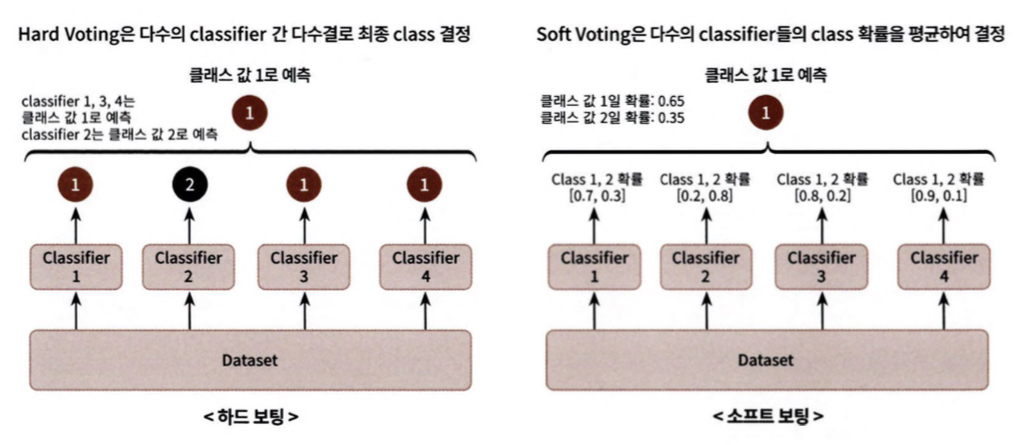

# 보팅 분류기

사이킷런 VotingClassifier 클래스 사용

In [1]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [2]:
#개별 모델은 로지스틱 회귀와 KNN임.
Ir_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', Ir_clf), ('KNN', knn_clf)], voting='soft' )
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state= 156)
# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

#개별 모델의 학습/예측/평가.
classifiers = [Ir_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name= classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


# 랜덤 포레스트

랜덤 포레스트: 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 됨.

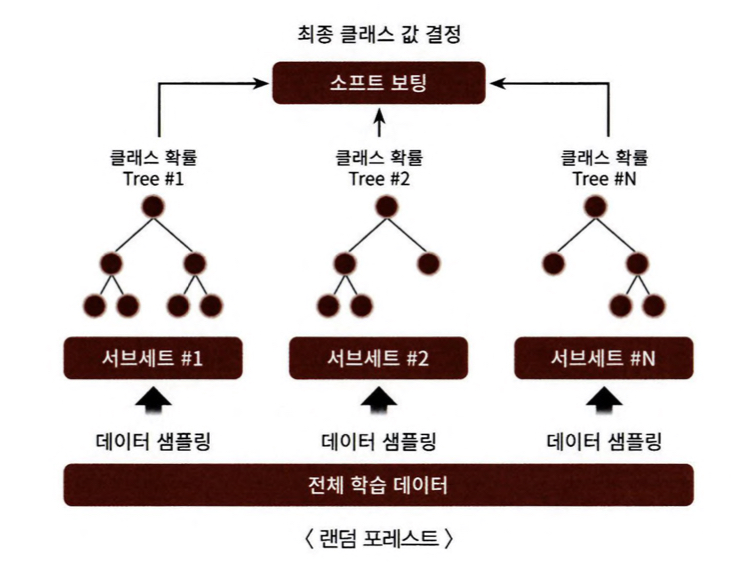

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                            'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                              if x[1] >0 else x[0], axis=1)


  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [5]:
def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 공백 문자를 sep으로 할당
  feature_name_df = pd.read_csv('/content/drive/MyDrive/features.txt', sep='\s+',
                                header=None, names=['column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df( )를 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  # 학습 피처 데이터 세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name
  X_train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/train/X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/test/X_test.txt', sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/train/y_train.txt', sep='\s+', names=['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/test/y_test.txt', sep = '\s+', names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

<ipython-input-4-8f9b2b45ea20>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[1] >0 else x[0], axis=1)
<ipython-input-4-8f9b2b45ea20>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])


# 랜덤 포레스트 하이퍼 파라미터 및 튜닝

- n_estimators: 랜덤 포레스트에서 결정 트리의 개수를 지정. 디폴트는 10갸
- max_features: 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처의 제곱근만큼 참조함
- max_depth, min_samples_leaf, min_samples_split

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9220


In [7]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8, 16, 24],
    'min_samples_leaf': [1, 6, 12],
    'min_samples_split': [2, 8, 16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 16}
최고 예측 정확도: 0.9157


In [8]:
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16,
                                 min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9253


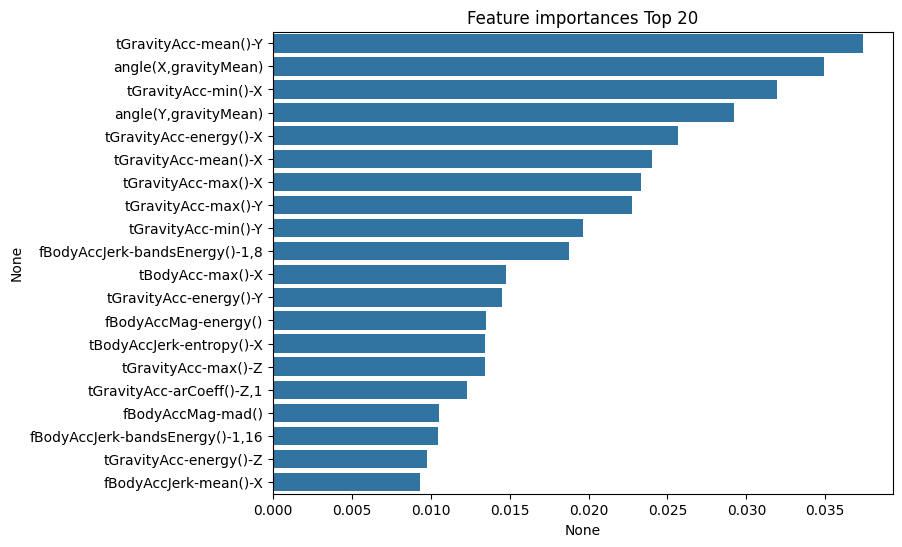

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# GBM의 개요 및 실습

- 부스팅 알고리즘은 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식

- AdaBoost: 오류 데이터에 가중치를 부여하면서 시스템을 수행하는 대표적인 알고리즘

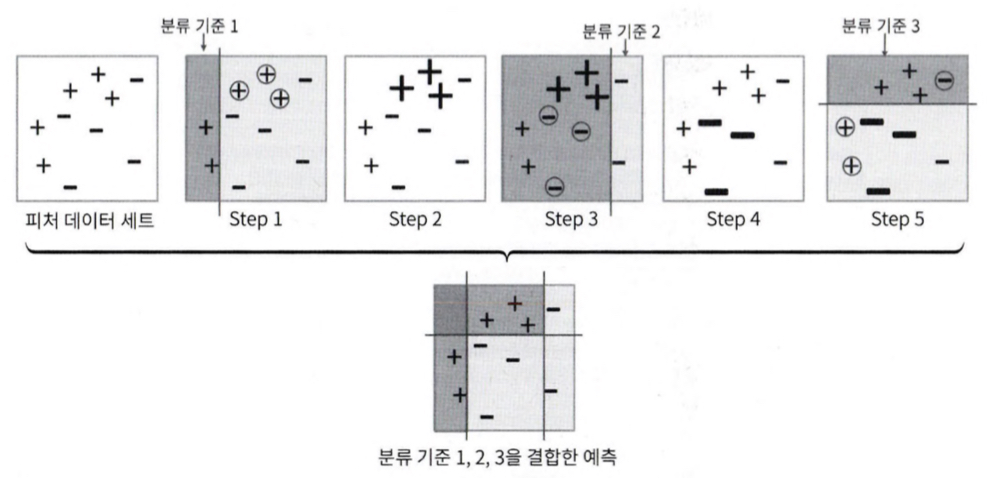

step1 - 첫 번째 약한 학습기가 분류 기준 1로 +, -를 분류한 것. +에 동그라미 표시는 오분류 데이터

step2 - 오류 데이터에 가중치를 부여해서 다음 약한 학습기가 더 잘 분류할 수 있게 함

step3 - 두 번째 약한 학습기가 분류 기준 2로 +, - 다시 구분

step4 - 잘못 분류된 - 오류 데이터에 대해 다음 약한 학습기가 잘 분류할 수 있도록 더 큰 가중치 부여

step5 - 세 번째 약한 학습기가 분류 기준 3으로 +와 -를 분류하고 오류 데이터를 찾음

마지막 맨 아래는 약한 학습기를 모두 결합한 결과로, 개별보다 훨씬 정확도 높아짐

GBM도 에이다부스트와 유사하나, 가중치 업데이트를 경사 하강법(Gradient Descent)를 이용하는 것이 큰 차이. 즉 오류식을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트함.

# GBM 하이퍼 파라미터

loss - 경사 하강법에서 사용할 손실 함수 지정. 기본값 'deviance'

learning_rate - GBM이 학습을 진행할 때마다 적용하는 학습률

n_estimator - weak learner의 개수. 기본값 100이며 너무 많으면 수행 시간 오래 걸림

subsample - weak learner가 학습에 사용하는 데이터의 샘플링 비율. 기본 1이며, 이는 전체 학습 데이터를 기반으로 학습. 0.5면 학습 데이터의 50퍼만

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초".format(time.time() - start_time))

GBM 정확도: 0.9379
GBM 수행 시간: 1265.5 초


In [50]:
# pip install xgboost

# XGBoost

하이퍼 파라미터

- 일반 파라미터: 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터

> booster: gbtree(디폴트), gblinear 중 선택.

 > silent: 디폴트 0, 출력 메시지 생략 시 1
  
  > nthread

- 부스터 파라미터: 트리 최적화, 부스팅, regularization 등과 관련된 파라미터 등을 지칭

- 학습 태스크 파라미터: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터

- XGB는 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능을 가지고 있음.

- ealry stopping으로 n_estimators에 지정한 부스팅 반복 횟수를 다 완료하지 않아도 예측 오류가 더 개선되지 않으면 중간에 중지 가능

In [57]:
import xgboost as xgb
from xgboost import XGBClassifier

In [58]:
import xgboost

print(xgboost.__version__)

3.0.0


In [21]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features= dataset.data
labels = dataset.target

In [22]:
cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target']= labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [23]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [24]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
#맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.

X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

#전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size=0.2, random_state = 156 )

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

print(X_train.shape , X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [25]:
#만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안 될 경우 X_train.values로 넘파이 변환.
#학습, 검증, 테스트용 DMatrix를 생성.
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [26]:
dtr = xgb.DMatrix(data=np.asarray(X_tr), label=np.asarray(y_tr))
dval = xgb.DMatrix(data=np.asarray(X_val), label=np.asarray(y_val))
dtest = xgb.DMatrix(data=np.asarray(X_test), label=np.asarray(y_test))

In [27]:
params = { 'max.depth':3,
          'eta': 0.05,
           'objective':'binary:logistic',
           'eval_metric':'logloss'
}
num_rounds = 400

In [28]:
#학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval' 로 명기합니다.
eval_list = [(dtr,'train'), (dval,'eval')] # 또는 eval_list = [(dval,'eval')] 만 명기해도 무방.

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round=num_rounds, \
                      early_stopping_rounds=50, evals=eval_list )

[0]	train-logloss:0.62387	eval-logloss:0.62700
[1]	train-logloss:0.58495	eval-logloss:0.59823
[2]	train-logloss:0.54966	eval-logloss:0.57299
[3]	train-logloss:0.51735	eval-logloss:0.55040
[4]	train-logloss:0.48791	eval-logloss:0.52853
[5]	train-logloss:0.46066	eval-logloss:0.50704
[6]	train-logloss:0.43481	eval-logloss:0.48815
[7]	train-logloss:0.41158	eval-logloss:0.47184
[8]	train-logloss:0.39010	eval-logloss:0.45683
[9]	train-logloss:0.37018	eval-logloss:0.44222
[10]	train-logloss:0.35167	eval-logloss:0.42944
[11]	train-logloss:0.33381	eval-logloss:0.41720
[12]	train-logloss:0.31773	eval-logloss:0.40596
[13]	train-logloss:0.30255	eval-logloss:0.39622
[14]	train-logloss:0.28789	eval-logloss:0.38590
[15]	train-logloss:0.27459	eval-logloss:0.37752
[16]	train-logloss:0.26224	eval-logloss:0.36938
[17]	train-logloss:0.25053	eval-logloss:0.36191
[18]	train-logloss:0.23935	eval-logloss:0.35509
[19]	train-logloss:0.22853	eval-logloss:0.34790
[20]	train-logloss:0.21841	eval-logloss:0.34078
[2

In [30]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.943 0.004 0.759 0.165 0.978 0.999 0.998 0.998 0.997 0.002]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [46]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test,pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test,pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도:{0:4f},정밀도:{1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [47]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 2 75]]
정확도:0.964912,정밀도:0.9740, 재현율: 0.9740, F1:0.9740, AUC:0.994735


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

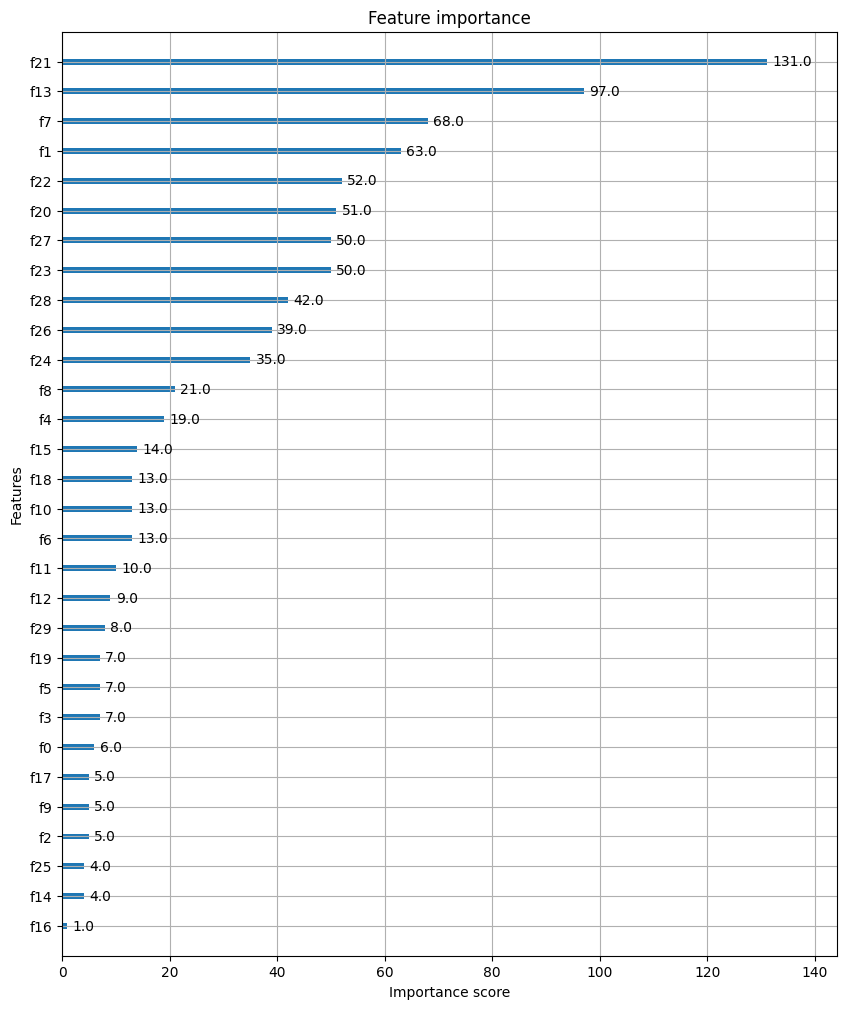

In [48]:
import matplotlib.pyplot as pit
%matplotlib inline

fig, ax = pit.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

In [51]:
#사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력.
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [52]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도:0.964912,정밀도:0.9620, 재현율: 0.9870, F1:0.9744, AUC:0.995086


In [62]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, early_stopping_rounds = 50, eval_metric="logloss")
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1 ]

[0]	validation_0-logloss:0.62473	validation_1-logloss:0.63088
[1]	validation_0-logloss:0.58662	validation_1-logloss:0.60461
[2]	validation_0-logloss:0.55210	validation_1-logloss:0.58205
[3]	validation_0-logloss:0.52068	validation_1-logloss:0.56165
[4]	validation_0-logloss:0.49173	validation_1-logloss:0.54101
[5]	validation_0-logloss:0.46517	validation_1-logloss:0.52206
[6]	validation_0-logloss:0.44009	validation_1-logloss:0.50271
[7]	validation_0-logloss:0.41646	validation_1-logloss:0.48606
[8]	validation_0-logloss:0.39505	validation_1-logloss:0.46961
[9]	validation_0-logloss:0.37523	validation_1-logloss:0.45485
[10]	validation_0-logloss:0.35682	validation_1-logloss:0.44120
[11]	validation_0-logloss:0.33964	validation_1-logloss:0.43123
[12]	validation_0-logloss:0.32279	validation_1-logloss:0.41962
[13]	validation_0-logloss:0.30783	validation_1-logloss:0.40848
[14]	validation_0-logloss:0.29308	validation_1-logloss:0.39857
[15]	validation_0-logloss:0.27928	validation_1-logloss:0.38945
[1

In [63]:
get_clf_eval(y_test , ws50_preds, ws50_pred_proba)

오차 행렬
[[35  2]
 [ 2 75]]
정확도:0.964912,정밀도:0.9740, 재현율: 0.9740, F1:0.9740, AUC:0.996490


In [65]:
# early_stopping_ro니nds를 10으로 설정하고 재학습.
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,
                            early_stopping_rounds = 10, eval_metric="logloss")
xgb_wrapper.fit(X_tr, y_tr, eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.62473	validation_1-logloss:0.63088
[1]	validation_0-logloss:0.58662	validation_1-logloss:0.60461
[2]	validation_0-logloss:0.55210	validation_1-logloss:0.58205
[3]	validation_0-logloss:0.52068	validation_1-logloss:0.56165
[4]	validation_0-logloss:0.49173	validation_1-logloss:0.54101
[5]	validation_0-logloss:0.46517	validation_1-logloss:0.52206
[6]	validation_0-logloss:0.44009	validation_1-logloss:0.50271
[7]	validation_0-logloss:0.41646	validation_1-logloss:0.48606
[8]	validation_0-logloss:0.39505	validation_1-logloss:0.46961
[9]	validation_0-logloss:0.37523	validation_1-logloss:0.45485
[10]	validation_0-logloss:0.35682	validation_1-logloss:0.44120
[11]	validation_0-logloss:0.33964	validation_1-logloss:0.43123
[12]	validation_0-logloss:0.32279	validation_1-logloss:0.41962
[13]	validation_0-logloss:0.30783	validation_1-logloss:0.40848
[14]	validation_0-logloss:0.29308	validation_1-logloss:0.39857
[15]	validation_0-logloss:0.27928	validation_1-logloss:0.38945
[1

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

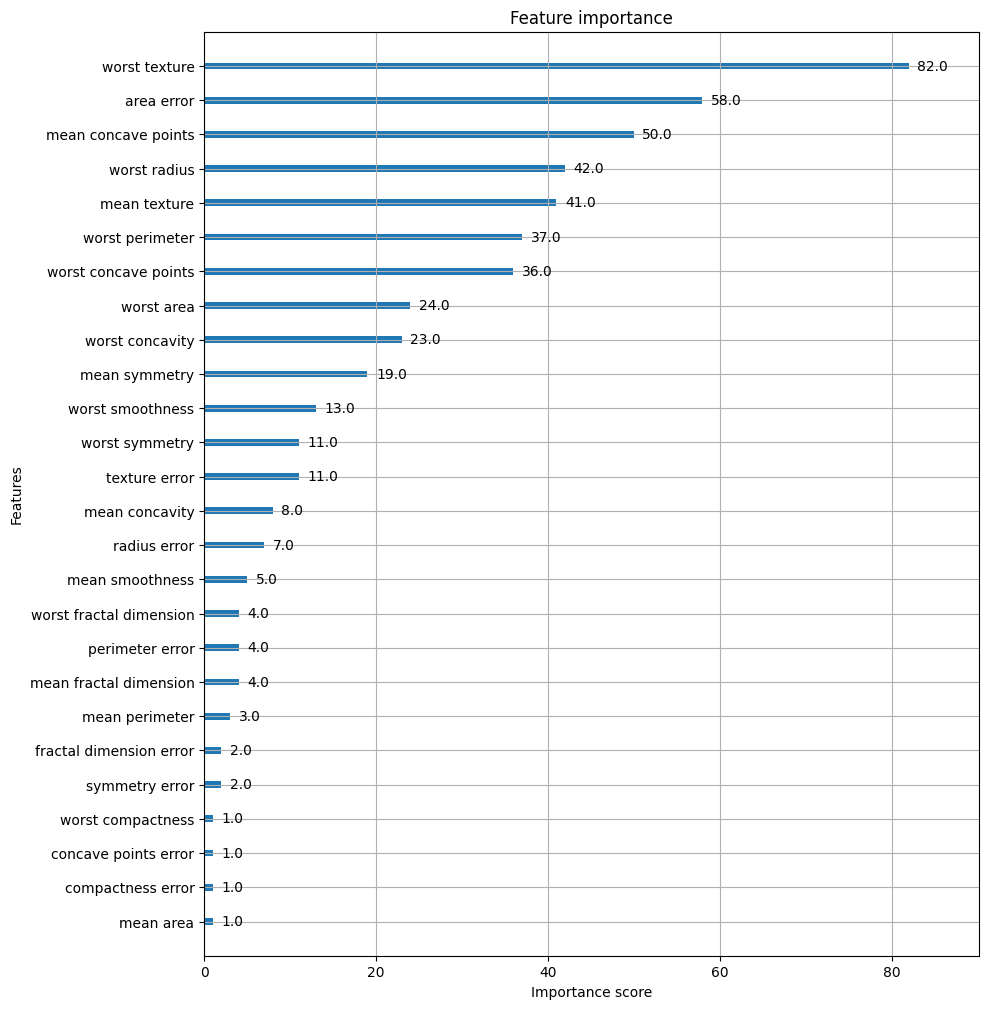

In [66]:
from xgboost import plot_importance
import matplotlib.pyplot as pit
%matplotlib inline

fig, ax = pit.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)